In [240]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

from sqw.tesselations import even_cycle_two_tesselation

In [241]:
def adjacency_tesselation_decomposition(A, T):
    
    nof_tesselations = len(T)
    nof_nodes = len(A)
    H = []
    
    for x in range(nof_tesselations):
        H_aux = np.zeros((nof_nodes, nof_nodes))
        for u,v in T[x]:
            H_aux[u,v] = A[u,v]
            H_aux[v,u] = A[v,u]
            H_aux[u,u] = A[u,u]
            H_aux[v,v] = A[v,v]
            
        H.append(H_aux)
        
    return H

def hamiltonians_to_unitaries(H, theta):
    nof_tesselations = len(H)
    U = [np.matrix(expm(-1j * theta[t] * H[t])) for t in range(nof_tesselations)]
        
    return U

def hamiltonian_evolution(U_tesselations, steps, initial_state, tesselation_order):
    
    final_state = initial_state
    U = np.eye(len(initial_state))
    
    for t in tesselation_order:
        U = U_tesselations[t] @ U
    
    for t in range(steps):
            final_state = U @ final_state
            
    return final_state

def state_to_distribution(state):
    return np.multiply(state, state.conjugate())

In [242]:
# Simple cycle generatarion
N = 100
G = nx.cycle_graph(N)

# Random edge weights
for u,v in G.edges():
    G.add_edge(u,v,weight = np.random.random_sample())

# Random self-loops weights
for u in G.nodes():
    G.add_edge(u,u,weight = .1*np.random.random_sample())

# Matrix representation: adjacency, laplacian and normanilised laplacian
A  = nx.adjacency_matrix(G).todense()
L  = nx.laplacian_matrix(G).todense()
NL = nx.normalized_laplacian_matrix(G).todense()

# Even cycle tesselation
T = even_cycle_two_tesselation(N)

# Hamiltonians decomposition
H_A = adjacency_tesselation_decomposition(A,T)
H_L = adjacency_tesselation_decomposition(L,T)
H_N = adjacency_tesselation_decomposition(NL,T)

U_A = hamiltonians_to_unitaries(H_A, [np.pi/4, np.pi/3])
U_L = hamiltonians_to_unitaries(H_L, [np.pi/4, np.pi/3])
U_N = hamiltonians_to_unitaries(H_N, [np.pi/4, np.pi/3])

# Initial state
initial_state = np.zeros((N,1))
initial_state[N//2] = 1
initial_state[N//2+1] = 1

# system evolution
steps = 100
tesselation_order = [0, 1]
final_state_a =  hamiltonian_evolution(U_A, steps, initial_state, tesselation_order)
final_state_l =  hamiltonian_evolution(U_L, steps, initial_state, tesselation_order)
final_state_n =  hamiltonian_evolution(U_N, steps, initial_state, tesselation_order)

final_distribution_a = state_to_distribution(final_state_a)
final_distribution_l = state_to_distribution(final_state_l)
final_distribution_n = state_to_distribution(final_state_l)

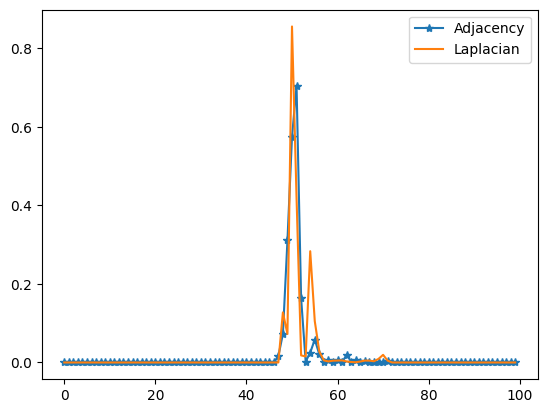

In [247]:
plt.plot(final_distribution_a,'*-')
plt.plot(final_distribution_l,'-')
# plt.plot(final_distribution_n, '--')
plt.legend(['Adjacency','Laplacian'])
plt.show()